In [60]:
import pandas as pd
import numpy as np
##visuals
import matplotlib.pyplot as plt
import seaborn as sns
## Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [203]:
df = pd.read_csv('to_machinelearning.csv')
test = pd.read_csv('clean_test.csv')

In [149]:
ml = df.copy()

In [150]:
ml.head()

,PassengerId,Passenger_group,Passenger_No,HomePlanet,CryoSleep,Cabin,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,Age_Catg,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Name,Transported
0,0001_01,1,1,Europa,False,B/0/P,B,P,BP,TRAPPIST-1e,39.0,21-40,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,1,Earth,False,F/0/S,F,S,FS,TRAPPIST-1e,24.0,21-40,False,109.0,9.0,25.0,549.0,44.0,702.0,Juanna Vines,True
2,0003_01,3,1,Europa,False,A/0/S,A,S,AS,TRAPPIST-1e,58.0,41-60,True,43.0,3576.0,0.0,6715.0,49.0,6807.0,Altark Susent,False
3,0003_02,3,2,Europa,False,A/0/S,A,S,AS,TRAPPIST-1e,33.0,21-40,False,0.0,1283.0,371.0,3329.0,193.0,3522.0,Solam Susent,False
4,0004_01,4,1,Earth,False,F/1/S,F,S,FS,TRAPPIST-1e,16.0,0-20,False,303.0,70.0,151.0,565.0,2.0,870.0,Willy Santantines,True


### Lets now do the data preprocessing

In [151]:
## dropping necessary features
# ml.drop(['PassengerId','Name','Passenger_group','Passenger_No','Cabin','Age_Catg','FoodCourt','ShoppingMall'],axis=1,inplace=True)

## Dropping minimum features
ml.drop(['PassengerId','Name','Passenger_group','Passenger_No','Cabin','Age_Catg'],axis=1,inplace=True)

## Dropping all unneccsary features
# ml.drop(['PassengerId','Name','Passenger_group','Cabin_Deck','Cabin_Side','Destination','Age','VIP','RoomService','Spa','VRDeck','Passenger_No','Cabin','Age_Catg','FoodCourt','ShoppingMall'],axis=1,inplace=True)

In [152]:
ml['HomePlanet'] = ml['HomePlanet'].map({'Earth':1,'Europa':2,'Mars':3})

In [153]:
ml['CryoSleep'] = ml['CryoSleep'].map({False:0,True:1})

In [154]:
ml['Cabin_Deck'] = ml['Cabin_Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8})

In [155]:
ml['Cabin_Side'] = ml['Cabin_Side'].map({'P':1,'S':2})

In [156]:
dslist = ml['Cabin_DS'].unique().tolist()
dsid = np.arange(1,len(dslist)+1)
ml['Cabin_DS'].replace(dslist,dsid,True)

In [157]:
ml['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [158]:
dest_list = ml['Destination'].unique().tolist()
dest_id = np.arange(1,len(dest_list)+1)
ml['Destination'].replace(dest_list,dest_id,True)

In [159]:
ml['VIP'] = ml['VIP'].map({True:1,False:0})

In [160]:
ml['Transported'] = ml['Transported'].map({True:1,False:0})

In [161]:
ml.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Transported
0,2,0,2,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,6,2,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,702.0,1
2,2,0,1,2,3,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,6807.0,0
3,2,0,1,2,3,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3522.0,0
4,1,0,6,2,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,870.0,1


In [162]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

<AxesSubplot:>

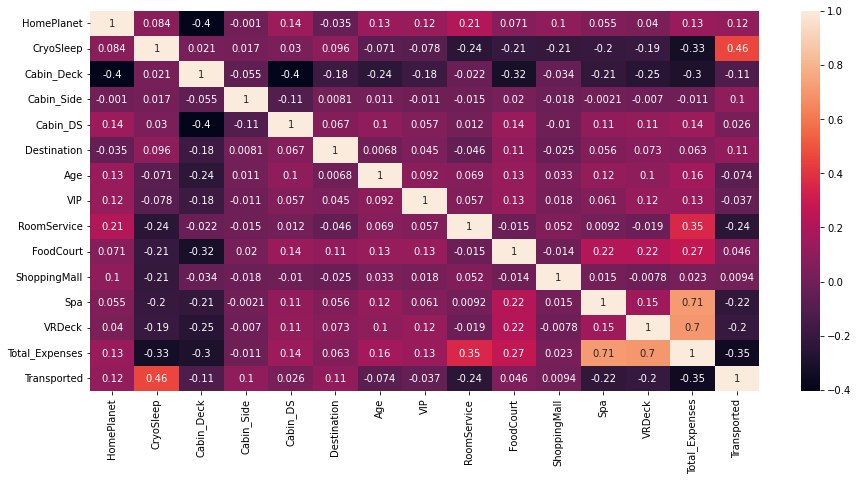

In [163]:
plt.figure(figsize=(15,7))
sns.heatmap(ml.corr(),annot=True)

### Let's check if the data is imballanced

1    4378
0    4315
Name: Transported, dtype: int64


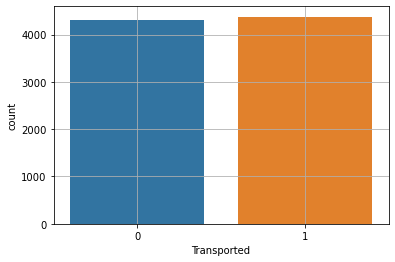

In [164]:
sns.countplot(ml.Transported)
plt.grid()
print(ml.Transported.value_counts())
plt.show()

### The data is perfectly balanced! 

In [165]:
x = ml.drop('Transported',axis=1)
y = ml.Transported

In [166]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=42)

### Logistics regression


Accuracy      : 0.77

ROC AUC Score : 0.85

Confusion Matrix :

 [[456 201]
 [105 542]]

Classification report :

               precision    recall  f1-score   support

           0       0.81      0.69      0.75       657
           1       0.73      0.84      0.78       647

    accuracy                           0.77      1304
   macro avg       0.77      0.77      0.76      1304
weighted avg       0.77      0.77      0.76      1304



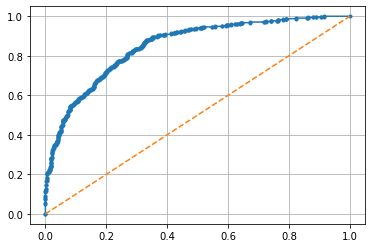

In [167]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_pp = lr_test_pp[:,1]
lr_acc = accuracy_score(ytest,lr_test_pred)
lr_cf = confusion_matrix(ytest,lr_test_pred)
lr_cr = classification_report(ytest,lr_test_pred)
lr_roc = roc_auc_score(ytest,lr_test_pp)
print('\nAccuracy      :',round(lr_acc,2))
print('\nROC AUC Score :',round(lr_roc,2))
print('\nConfusion Matrix :\n\n',lr_cf)
print('\nClassification report :\n\n',lr_cr)
fpr,tpr,thres = roc_curve(ytest,lr_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### KNN


Accuracy      : 0.78

ROC AUC Score : 0.84

Confusion Matrix :

 [[515 142]
 [148 499]]

Classification report :

               precision    recall  f1-score   support

           0       0.78      0.78      0.78       657
           1       0.78      0.77      0.77       647

    accuracy                           0.78      1304
   macro avg       0.78      0.78      0.78      1304
weighted avg       0.78      0.78      0.78      1304



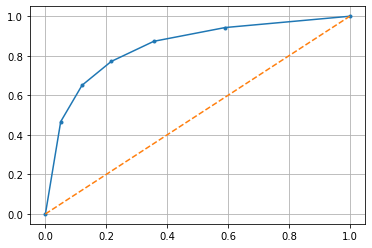

In [168]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_pp = kn_test_pp[:,1]
kn_acc = accuracy_score(ytest,kn_test_pred)
kn_cf = confusion_matrix(ytest,kn_test_pred)
kn_cr = classification_report(ytest,kn_test_pred)
kn_roc = roc_auc_score(ytest,kn_test_pp)
print('\nAccuracy      :',round(kn_acc,2))
print('\nROC AUC Score :',round(kn_roc,2))
print('\nConfusion Matrix :\n\n',kn_cf)
print('\nClassification report :\n\n',kn_cr)
fpr,tpr,thres = roc_curve(ytest,kn_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Decision Tree


Accuracy      : 0.75

ROC AUC Score : 0.77

Confusion Matrix :

 [[485 172]
 [151 496]]

Classification report :

               precision    recall  f1-score   support

           0       0.76      0.74      0.75       657
           1       0.74      0.77      0.75       647

    accuracy                           0.75      1304
   macro avg       0.75      0.75      0.75      1304
weighted avg       0.75      0.75      0.75      1304



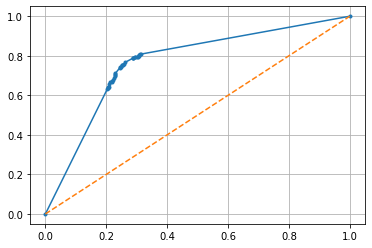

In [169]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_pp = dt_test_pp[:,1]
dt_acc = accuracy_score(ytest,dt_test_pred)
dt_cf = confusion_matrix(ytest,dt_test_pred)
dt_cr = classification_report(ytest,dt_test_pred)
dt_roc = roc_auc_score(ytest,dt_test_pp)
print('\nAccuracy      :',round(dt_acc,2))
print('\nROC AUC Score :',round(dt_roc,2))
print('\nConfusion Matrix :\n\n',dt_cf)
print('\nClassification report :\n\n',dt_cr)
fpr,tpr,thres = roc_curve(ytest,dt_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Random Forest


Accuracy      : 0.78

ROC AUC Score : 0.86

Confusion Matrix :

 [[515 142]
 [143 504]]

Classification report :

               precision    recall  f1-score   support

           0       0.78      0.78      0.78       657
           1       0.78      0.78      0.78       647

    accuracy                           0.78      1304
   macro avg       0.78      0.78      0.78      1304
weighted avg       0.78      0.78      0.78      1304



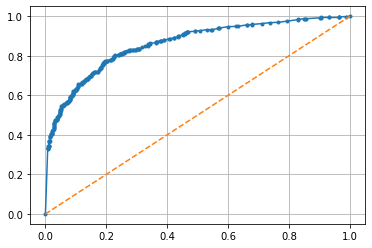

In [170]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_pp = rf_test_pp[:,1]
rf_acc = accuracy_score(ytest,rf_test_pred)
rf_cf = confusion_matrix(ytest,rf_test_pred)
rf_cr = classification_report(ytest,rf_test_pred)
rf_roc = roc_auc_score(ytest,rf_test_pp)
print('\nAccuracy      :',round(rf_acc,2))
print('\nROC AUC Score :',round(rf_roc,2))
print('\nConfusion Matrix :\n\n',rf_cf)
print('\nClassification report :\n\n',rf_cr)
fpr,tpr,thres = roc_curve(ytest,rf_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Gradient Boosting


Accuracy      : 0.78

ROC AUC Score : 0.88

Confusion Matrix :

 [[473 184]
 [ 97 550]]

Classification report :

               precision    recall  f1-score   support

           0       0.83      0.72      0.77       657
           1       0.75      0.85      0.80       647

    accuracy                           0.78      1304
   macro avg       0.79      0.79      0.78      1304
weighted avg       0.79      0.78      0.78      1304



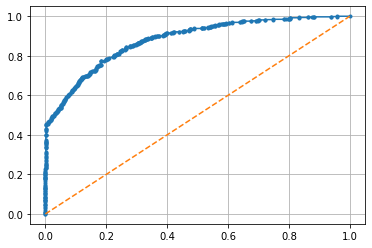

In [171]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_pp = gb.predict_proba(xtest)
gb_test_pp = gb_test_pp[:,1]
gb_acc = accuracy_score(ytest,gb_test_pred)
gb_cf = confusion_matrix(ytest,gb_test_pred)
gb_cr = classification_report(ytest,gb_test_pred)
gb_roc = roc_auc_score(ytest,gb_test_pp)
print('\nAccuracy      :',round(gb_acc,2))
print('\nROC AUC Score :',round(gb_roc,2))
print('\nConfusion Matrix :\n\n',gb_cf)
print('\nClassification report :\n\n',gb_cr)
fpr,tpr,thres = roc_curve(ytest,gb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### XGB

[12:08:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy      : 0.8

ROC AUC Score : 0.88

Confusion Matrix :

 [[516 141]
 [123 524]]

Classification report :

               precision    recall  f1-score   support

           0       0.81      0.79      0.80       657
           1       0.79      0.81      0.80       647

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



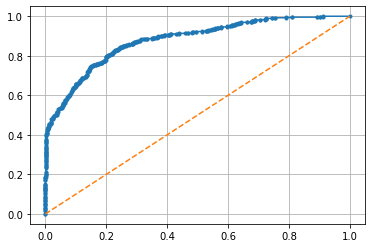

In [172]:
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_pp = xgb_test_pp[:,1]
xgb_acc = accuracy_score(ytest,xgb_test_pred)
xgb_cf = confusion_matrix(ytest,xgb_test_pred)
xgb_cr = classification_report(ytest,xgb_test_pred)
xgb_roc = roc_auc_score(ytest,xgb_test_pp)
print('\nAccuracy      :',round(xgb_acc,2))
print('\nROC AUC Score :',round(xgb_roc,2))
print('\nConfusion Matrix :\n\n',xgb_cf)
print('\nClassification report :\n\n',xgb_cr)
fpr,tpr,thres = roc_curve(ytest,xgb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### XGBRF

[12:08:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy      : 0.79

ROC AUC Score : 0.88

Confusion Matrix :

 [[468 189]
 [ 89 558]]

Classification report :

               precision    recall  f1-score   support

           0       0.84      0.71      0.77       657
           1       0.75      0.86      0.80       647

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



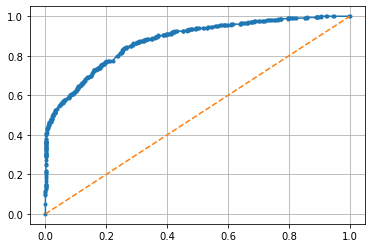

In [173]:
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_pp = xgbrf_test_pp[:,1]
xgbrf_acc = accuracy_score(ytest,xgbrf_test_pred)
xgbrf_cf = confusion_matrix(ytest,xgbrf_test_pred)
xgbrf_cr = classification_report(ytest,xgbrf_test_pred)
xgbrf_roc = roc_auc_score(ytest,xgbrf_test_pp)
print('\nAccuracy      :',round(xgbrf_acc,2))
print('\nROC AUC Score :',round(xgbrf_roc,2))
print('\nConfusion Matrix :\n\n',xgbrf_cf)
print('\nClassification report :\n\n',xgbrf_cr)
fpr,tpr,thres = roc_curve(ytest,xgbrf_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()


Accuracy      : 0.79

ROC AUC Score : 0.89

Confusion Matrix :

 [[495 162]
 [112 535]]

Classification report :

               precision    recall  f1-score   support

           0       0.82      0.75      0.78       657
           1       0.77      0.83      0.80       647

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



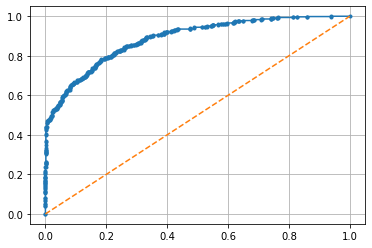

In [174]:
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_pp = cat_test_pp[:,1]
cat_acc = accuracy_score(ytest,cat_test_pred)
cat_cf = confusion_matrix(ytest,cat_test_pred)
cat_cr = classification_report(ytest,cat_test_pred)
cat_roc = roc_auc_score(ytest,cat_test_pp)
print('\nAccuracy      :',round(cat_acc,2))
print('\nROC AUC Score :',round(cat_roc,2))
print('\nConfusion Matrix :\n\n',cat_cf)
print('\nClassification report :\n\n',cat_cr)
fpr,tpr,thres = roc_curve(ytest,cat_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### LightGBM


Accuracy      : 0.8

ROC AUC Score : 0.88

Confusion Matrix :

 [[499 158]
 [109 538]]

Classification report :

               precision    recall  f1-score   support

           0       0.82      0.76      0.79       657
           1       0.77      0.83      0.80       647

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



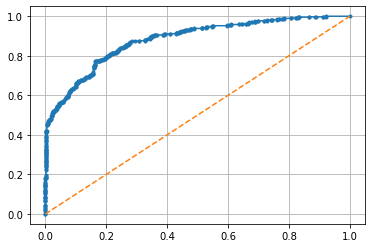

In [175]:
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_pp = lgb_test_pp[:,1]
lgb_acc = accuracy_score(ytest,lgb_test_pred)
lgb_cf = confusion_matrix(ytest,lgb_test_pred)
lgb_cr = classification_report(ytest,lgb_test_pred)
lgb_roc = roc_auc_score(ytest,lgb_test_pp)
print('\nAccuracy      :',round(lgb_acc,2))
print('\nROC AUC Score :',round(lgb_roc,2))
print('\nConfusion Matrix :\n\n',lgb_cf)
print('\nClassification report :\n\n',lgb_cr)
fpr,tpr,thres = roc_curve(ytest,lgb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Lets now take the ensemble of all the models that have performed well

In [176]:
lr_test_pp = lr_test_pp.tolist()
kn_test_pp = kn_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
gb_test_pp = gb_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [177]:
ensemble = pd.DataFrame({'lr':lr,'rf':rf_test_pp,'gb':gb_test_pp,'xgb':xgb_test_pp,'xgbrf':xgbrf_test_pp,'cat':cat_test_pp,
                        'lgb':lgb_test_pp})

In [178]:
ensemble.head()

,rf,gb,xgb,xgbrf,cat,lgb
0,0.280000,0.163147,0.036048,0.210828,0.113037,0.192587
1,0.710000,0.715430,0.756175,0.664947,0.782552,0.781457
2,0.755286,0.727477,0.808598,0.702344,0.763454,0.777433
3,0.690000,0.455822,0.464364,0.529824,0.581222,0.599857
4,1.000000,0.925221,0.985320,0.876098,0.950326,0.986051


In [179]:
mean = []
for i in ensemble.index:
    mean.append(ensemble.iloc[i].mean())
ensemble['mean_proba'] = mean

In [180]:
ensemble.head()

,rf,gb,xgb,xgbrf,cat,lgb,mean_proba
0,0.280000,0.163147,0.036048,0.210828,0.113037,0.192587,0.165941
1,0.710000,0.715430,0.756175,0.664947,0.782552,0.781457,0.735094
2,0.755286,0.727477,0.808598,0.702344,0.763454,0.777433,0.755766
3,0.690000,0.455822,0.464364,0.529824,0.581222,0.599857,0.553515
4,1.000000,0.925221,0.985320,0.876098,0.950326,0.986051,0.953836


In [185]:
fpr,tpr,threshold = roc_curve(ytest,ensemble['mean_proba'])

0.8827806125449622


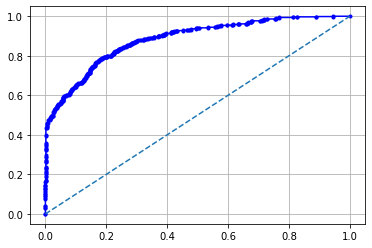

In [186]:
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
print(roc_auc_score(ytest,ensemble['mean_proba']))
plt.show()

In [188]:
acc=[]
for i in threshold:
    ypred = np.where(ensemble.mean_proba>i,1,0)
    acc.append(accuracy_score(ytest,ypred))
    
decider = pd.concat([pd.Series(threshold),pd.Series(acc)],axis=1)
decider.rename(columns = {0: 'Threshold', 1: 'Accuracies'}, inplace = True)
decider.sort_values('Accuracies',ascending=False)

,Threshold,Accuracies
219,0.570665,0.801380
221,0.569938,0.801380
222,0.567152,0.800613
216,0.576629,0.800613
217,0.573099,0.800613
218,0.570920,0.800613
220,0.570532,0.800613
224,0.565881,0.800613
215,0.578661,0.799847
223,0.566051,0.799847


In [190]:
final_preds = []
for i in ensemble.mean_proba:
    if i > threshold[219]:
        final_preds.append(1)
    else:
        final_preds.append(0)

In [191]:
accuracy_score(ytest,final_preds)

0.8013803680981595

In [208]:
rf.feature_importances_

array([0.03901517, 0.0692918 , 0.04196343, 0.01479111, 0.04038911,
       0.02286756, 0.15236702, 0.00231111, 0.08082249, 0.08235831,
       0.07409966, 0.0831632 , 0.07130489, 0.22525514])

In [207]:
ml.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Transported
0,2,0,2,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,6,2,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,702.0,1
2,2,0,1,2,3,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,6807.0,0
3,2,0,1,2,3,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3522.0,0
4,1,0,6,2,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,870.0,1


In [205]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [206]:
ids = test['PassengerId'].tolist()

In [194]:
test.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [204]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [202]:
ml.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Transported
0,2,0,2,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,6,2,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,702.0,1
2,2,0,1,2,3,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,6807.0,0
3,2,0,1,2,3,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3522.0,0
4,1,0,6,2,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,870.0,1


In [196]:
test['HomePlanet'] = test['HomePlanet'].map({'Earth':1,'Europa':2,'Mars':3})

In [198]:
test['CryoSleep'] = test['CryoSleep'].map({False:0,True:1})

In [200]:
test['Destination'].replace(dest_list,dest_id,True)